In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('Market_Portfolio.xlsx')
df = df.set_index('Date')

df1 = pd.read_excel('Industry_Portfolios.xlsx')
df1 = df1.set_index('Date')

df = pd.concat([df,df1],axis=1)
df

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Market,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,,
200401,2.22,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,1.46,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-1.23,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,-1.75,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,1.23,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
201308,-2.69,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,3.76,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.17,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


# Question 1 - Method 1 use manual formula. Beta = cov 1,m / var m => then find alpha

In [4]:
df_cov = df.cov()
df_cov

,Market,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Market,18.846466,12.300096,31.069071,22.047469,18.278244,21.352470,16.975563,15.576461,12.684344,10.141021,22.753517
NoDur,12.300096,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,31.069071,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,22.047469,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,18.278244,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,21.352470,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,16.975563,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,15.576461,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,12.684344,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,10.141021,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960


In [5]:
industry_list = list(df1.columns)
industry_list

['NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'HiTec',
 'Telcm',
 'Shops',
 'Hlth',
 'Utils',
 'Other']

In [6]:
def get_beta (industry):
    cov_im = df_cov.loc['Market', industry]
    var_m = df_cov.loc['Market','Market']
    beta = cov_im / var_m
    return beta

In [7]:
def get_alpha (industry):
    Ri = df[industry]
    Rf = 0.13                         #TUNE!
    beta = get_beta(industry)
    Rm = df['Market']
    alpha = (Ri - Rf) - (beta*(Rm - Rf))
    return np.average(alpha)

In [8]:
print(get_beta('NoDur'))
print(get_alpha('NoDur'))

0.6526473559635406
0.36944288006820164


In [9]:
industry_list = list(df.columns[1:])
industry_list

df3 = pd.DataFrame()
df3['Industry'] = industry_list
df3['Alpha'] = list(map(get_alpha, industry_list))
df3['Beta'] = list(map(get_beta, industry_list))

df3 = df3.set_index('Industry')
df3

,Alpha,Beta
Industry,,
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086


# Question 1 - Method 2 (use linear regression np.polyfit())

In [12]:
from scipy.stats import linregress

In [13]:
industry_list = list(df.columns[1:])
Rf = 0.13                 #TUNE!!

In [14]:
industry_list

['NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'HiTec',
 'Telcm',
 'Shops',
 'Hlth',
 'Utils',
 'Other']

In [15]:
list_beta = []
list_alpha = []

In [16]:
np.polyfit?

Signature:       np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Call signature:  np.polyfit(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function polyfit at 0x103a7d260>
File:            /opt/anaconda3/lib/python3.12/site-packages/numpy/lib/polynomial.py
Docstring:      
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more

In [17]:
for industry in industry_list:
    beta_slope, alpha_intercept = np.polyfit (df['Market'] - Rf,  df[industry] - Rf,  1) 
                                    #independent var (x), such as excess market return, depended var (y) such as excess portfol return 
    list_beta.append(beta_slope)
    list_alpha.append(alpha_intercept)



In [18]:
data = {'Industry':industry_list, 'Alpha': list_alpha, 'Beta': list_beta}

In [19]:
len(industry_list)

10

In [20]:
len(list_alpha)

10

In [21]:
len(list_beta)

10

In [22]:
new_df = pd.DataFrame(data)

In [23]:
new_df.set_index('Industry')

,Alpha,Beta
Industry,,
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086


# Question 2 - find the mean excess return (Ri)

In [25]:
df4 = pd.DataFrame(df.mean())
df4 = df4.rename(columns={0 : 'Ri'})

In [26]:
df4[['Ri']]

,Ri
Market,0.748083
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167


In [27]:
mean_ri = df.mean()

In [28]:
mean_ri

Market    0.748083
NoDur     0.902833
Durbl     0.733333
Manuf     1.012833
Enrgy     1.231167
HiTec     0.766250
Telcm     0.881417
Shops     0.916333
Hlth      0.783833
Utils     0.907167
Other     0.489083
dtype: float64

In [29]:
Rf = 0.13

In [30]:
excess_return = mean_ri - Rf

In [31]:
excess_return

Market    0.618083
NoDur     0.772833
Durbl     0.603333
Manuf     0.882833
Enrgy     1.101167
HiTec     0.636250
Telcm     0.751417
Shops     0.786333
Hlth      0.653833
Utils     0.777167
Other     0.359083
dtype: float64

In [32]:
excess_market_return = excess_return['Market']

In [33]:
excess_market_return

0.6180833333333332

In [34]:
df4['Ri-Rf'] = excess_return
df4['Rm-Rf'] = excess_market_return

In [35]:
df4

,Ri,Ri-Rf,Rm-Rf
Market,0.748083,0.618083,0.618083
NoDur,0.902833,0.772833,0.618083
Durbl,0.733333,0.603333,0.618083
Manuf,1.012833,0.882833,0.618083
Enrgy,1.231167,1.101167,0.618083
HiTec,0.766250,0.636250,0.618083
Telcm,0.881417,0.751417,0.618083
Shops,0.916333,0.786333,0.618083
Hlth,0.783833,0.653833,0.618083
Utils,0.907167,0.777167,0.618083


In [36]:
industry_list = list(df.columns)
industry_list

['Market',
 'NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'HiTec',
 'Telcm',
 'Shops',
 'Hlth',
 'Utils',
 'Other']

In [37]:
df5 = pd.DataFrame()
df5['Industry'] = industry_list
df5['Alpha'] = list(map(get_alpha, industry_list))
df5['Beta'] = list(map(get_beta, industry_list))

df5 = df5.set_index('Industry')

In [38]:
df6 = pd.concat([df5, df4], axis = 1)
df6

,Alpha,Beta,Ri,Ri-Rf,Rm-Rf
Market,0.000000,1.000000,0.748083,0.618083,0.618083
NoDur,0.369443,0.652647,0.902833,0.772833,0.618083
Durbl,-0.415599,1.648536,0.733333,0.603333,0.618083
Manuf,0.159771,1.169846,1.012833,0.882833,0.618083
Enrgy,0.501719,0.969850,1.231167,1.101167,0.618083
HiTec,-0.064020,1.132969,0.766250,0.636250,0.618083
Telcm,0.194691,0.900729,0.881417,0.751417,0.618083
Shops,0.275492,0.826492,0.916333,0.786333,0.618083
Hlth,0.237841,0.673036,0.783833,0.653833,0.618083
Utils,0.444585,0.538086,0.907167,0.777167,0.618083


In [39]:
betas = df6.Beta.to_numpy()
mean_ri = df6.Ri.to_numpy()

> ## Regression!! np.polyfit(x,y,deg)

In [41]:
SML_gradient, SML_intercept = np.polyfit(betas, mean_ri, deg = 1)

In [42]:
SML_gradient

-0.18546745836573272

In [43]:
SML_intercept

1.0327683682657056

In [44]:
beta_b = [0,2]             #TUNE!!
beta_b

[0, 2]

In [45]:
list_y = list()

for x in beta_b:
    y = SML_intercept + (SML_gradient * (x - 0))        #Y - Y0 = M (X - X0)
    list_y.append(y)

list_y

[1.0327683682657056, 0.6618334515342401]

Text(0.5, 1.0, 'Security Market Line of 10 Industries and Market Portfolio')

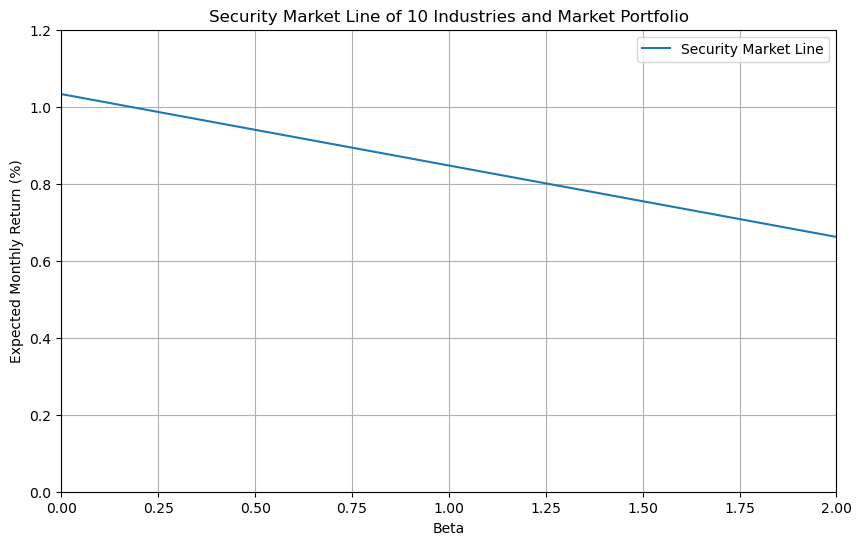

In [46]:
plt.figure(figsize = [10,6])
plt.plot(beta_b, list_y, label = 'Security Market Line')
plt.legend()

plt.grid()

plt.xlim(0,2)
plt.ylim(0, 1.2)

plt.xlabel('Beta')
plt.ylabel('Expected Monthly Return (%)')

plt.title('Security Market Line of 10 Industries and Market Portfolio')

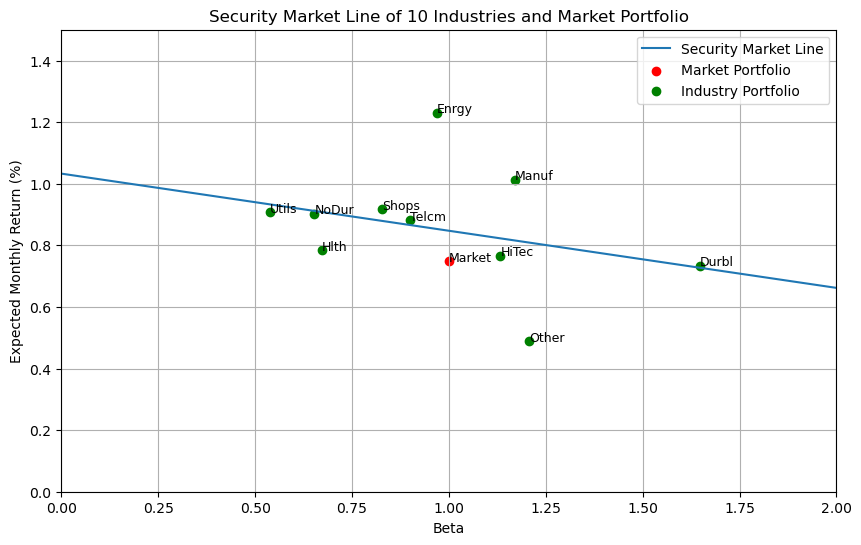

In [47]:
plt.figure(figsize = [10,6])
plt.plot(beta_b, list_y, label = 'Security Market Line')


plt.grid()

plt.xlim(0,2)
plt.ylim(0,1.5)

plt.xlabel('Beta')
plt.ylabel('Expected Monthly Return (%)')

plt.title('Security Market Line of 10 Industries and Market Portfolio')

plt.scatter(betas[0], mean_ri[0], color = 'red', label = 'Market Portfolio')

plt.scatter(betas[1:], mean_ri[1:], color = 'green', label = 'Industry Portfolio')

# Add labels for each point
for i, label in enumerate(industry_list):
    plt.text(betas[i], mean_ri[i], label, fontsize=9)
    
plt.legend()